In [2]:
import geojson
import folium
import numpy as np
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

In [3]:

m = folium.Map(location = [18.33952, -66.780384], zoom_start = 9)
boundsdata = r'C:\python_workfolder\pr_newbound.json'
farm_data = r'C:\python_workfolder\PR_farms.json'
folium.GeoJson(boundsdata).add_to(m)
# folium.GeoJson(farm_data).add_to(m)
m

In [4]:
#connect to api
user = 'inigop'
password = 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [5]:
#search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))
print(footprint)

POLYGON((-67.0221 18.0884,-66.3712 18.0884,-66.3712 18.4145,-67.0221 18.4145,-67.0221 18.0884))


In [43]:
#search for image
july_oct_products = api.query(footprint,
                     date = ('20150701', '20151001'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 20))
print(july_oct_products)

OrderedDict()


In [79]:
#search for image
oct_feb_products = api.query(footprint,
                     date = ('20151001', '20160201'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 4))
#metadata
for k in oct_feb_products.keys():
    print(k)
    for item in oct_feb_products[k]:
        print (item)
        print (oct_feb_products[k][item])

363e871c-6702-4441-ac79-faa330b2c715
title
S2A_MSIL1C_20151225T150742_N0201_R082_T19QGA_20151225T150744
link
https://scihub.copernicus.eu/dhus/odata/v1/Products('363e871c-6702-4441-ac79-faa330b2c715')/$value
link_alternative
https://scihub.copernicus.eu/dhus/odata/v1/Products('363e871c-6702-4441-ac79-faa330b2c715')/
link_icon
https://scihub.copernicus.eu/dhus/odata/v1/Products('363e871c-6702-4441-ac79-faa330b2c715')/Products('Quicklook')/$value
summary
Date: 2015-12-25T15:07:42.029Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 433.87 MB
datatakesensingstart
2015-12-25 15:07:42.029000
beginposition
2015-12-25 15:07:42.029000
endposition
2015-12-25 15:07:42.029000
ingestiondate
2018-12-20 06:49:54.685000
orbitnumber
2653
relativeorbitnumber
82
cloudcoverpercentage
4.0
gmlfootprint
<gml:Polygon srsName="http://www.opengis.net/gml/srs/epsg.xml#4326" xmlns:gml="http://www.opengis.net/gml">
   <gml:outerBoundaryIs>
      <gml:LinearRing>
         <gml:coordinates>18.98277551,-67.10

platformserialidentifier
Sentinel-2A
processingbaseline
02.01
processinglevel
Level-1C
producttype
S2MSI1C
platformname
Sentinel-2
size
442.31 MB
tileid
19QGA
hv_order_tileid
QA19G
filename
S2A_MSIL1C_20160104T150742_N0201_R082_T19QGA_20160104T150743.SAFE
identifier
S2A_MSIL1C_20160104T150742_N0201_R082_T19QGA_20160104T150743
uuid
2e957af6-b3d0-411f-923c-da9ce48727c3
level1cpdiidentifier
S2A_OPER_MSI_L1C_TL_SGS__20160104T203340_A002796_T19QGA_N02.01
granuleidentifier
S2A_OPER_MSI_L1C_TL_SGS__20160104T203340_A002796_T19QGA_N02.01
datastripidentifier
S2A_OPER_MSI_L1C_DS_SGS__20160104T203340_S20160104T150743_N02.01


In [42]:
#search for image
feb_may_products = api.query(footprint,
                     date = ('20160201', '20160501'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 12))
for item in feb_may_products:
    print(item)
    print(feb_may_products[item]['tileid'])

# print(feb_may_products)

c82caa04-e240-4314-909d-c7c7e4f647c1
19QFA
a4a488d1-5ede-49e2-86c6-2a029bea882e
19QFA
16db11f9-964d-4505-9de4-75b37c571a8d
19QGA
9c333389-c0c2-4cc6-904d-c9a81673a5ee
19QFA


In [80]:
api.download('363e871c-6702-4441-ac79-faa330b2c715')#december_product*needs to download

Product 363e871c-6702-4441-ac79-faa330b2c715 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

In [8]:
api.download('2e957af6-b3d0-411f-923c-da9ce48727c3')

Downloading: 100%|██████████████████████████████| 464M/464M [00:24<00:00, 18.9MB/s]
MD5 checksumming: 100%|██████████████████████████| 464M/464M [00:02<00:00, 194MB/s]


{'id': '2e957af6-b3d0-411f-923c-da9ce48727c3',
 'title': 'S2A_MSIL1C_20160104T150742_N0201_R082_T19QGA_20160104T150743',
 'size': 464023713,
 'md5': 'b9d9409ee1af0035d25b2668fc73b2c8',
 'date': datetime.datetime(2016, 1, 4, 15, 7, 42, 29000),
 'footprint': 'POLYGON((-67.10061214 18.98277551,-67.11151206 17.9909285,-66.07534068 17.97806128,-66.05847745 18.96914765,-67.10061214 18.98277551,-67.10061214 18.98277551))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('2e957af6-b3d0-411f-923c-da9ce48727c3')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2018, 12, 18, 21, 4, 21, 622000),
 'Ingestion Date': datetime.datetime(2018, 12, 18, 20, 55, 15, 330000),
 'path': '.\\S2A_MSIL1C_20160104T150742_N0201_R082_T19QGA_20160104T150743.zip',
 'downloaded_bytes': 464023713}

In [107]:
#search for image
may_aug_products = api.query(footprint,
                     date = ('20160501', '20160801'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 12))
print(may_aug_products)

OrderedDict([('c57171f8-a5c7-4cda-86ea-4dffa60817f3', {'title': 'S2A_MSIL1C_20160503T150722_N0202_R082_T19QFA_20160503T150724', 'link': "https://scihub.copernicus.eu/dhus/odata/v1/Products('c57171f8-a5c7-4cda-86ea-4dffa60817f3')/$value", 'link_alternative': "https://scihub.copernicus.eu/dhus/odata/v1/Products('c57171f8-a5c7-4cda-86ea-4dffa60817f3')/", 'link_icon': "https://scihub.copernicus.eu/dhus/odata/v1/Products('c57171f8-a5c7-4cda-86ea-4dffa60817f3')/Products('Quicklook')/$value", 'summary': 'Date: 2016-05-03T15:07:22.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 666.14 MB', 'datatakesensingstart': datetime.datetime(2016, 5, 3, 15, 7, 22, 27000), 'beginposition': datetime.datetime(2016, 5, 3, 15, 7, 22, 27000), 'endposition': datetime.datetime(2016, 5, 3, 15, 7, 22, 27000), 'ingestiondate': datetime.datetime(2018, 11, 9, 21, 0, 30, 105000), 'orbitnumber': 4512, 'relativeorbitnumber': 82, 'cloudcoverpercentage': 3.4478, 'gmlfootprint': '<gml:Polygon srsName="http://ww

In [11]:
aug_dec_products = api.query(footprint,
                     date = ('20160801', '20161231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 7))
print(len(aug_dec_products))

8


In [74]:
api.download('8c4dfcd6-e229-4c7a-8d80-1d40d2bea81a')#novproduct* still needs download

Product 8c4dfcd6-e229-4c7a-8d80-1d40d2bea81a is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

In [132]:
jan_march_2017products = api.query(footprint,
                     date = ('20170101', '20170331'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 7))
print(len(jan_march_2017products))

8


In [13]:
april_aug2017products = api.query(footprint,
                     date = ('20170401', '20170831'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 10))
print(len(april_aug2017products))

12


In [75]:
api.download('919501a2-3845-4580-bc35-a0b5a861aa90')

Product 919501a2-3845-4580-bc35-a0b5a861aa90 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

In [76]:
api.download('30b8911f-2b77-4d65-a12d-c4213b9f4a75') #jan_product#stillneedstodownload

Product 30b8911f-2b77-4d65-a12d-c4213b9f4a75 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

e449ca44-35a0-46d5-856f-7a11efcea22b    Annotation(-67.5374, 18.3051, 'e449ca44-35a0-4...
9aa2ef3f-062a-41ca-8a2b-06eed44bb4ba    Annotation(-67.5002, 18.4735, '9aa2ef3f-062a-4...
c24a0e6b-fceb-4e57-80b0-471f5e9bc2ef    Annotation(-67.4987, 18.4731, 'c24a0e6b-fceb-4...
166cb79a-7f29-4750-9a2c-940743c957b5    Annotation(-67.5386, 18.3005, '166cb79a-7f29-4...
7d073ec7-2358-4644-a14c-51bdc6fca9c8    Annotation(-67.5284, 18.3375, '7d073ec7-2358-4...
73a86405-1f98-45de-ba9a-627e9827b42e    Annotation(-67.4958, 18.4724, '73a86405-1f98-4...
573f8a5c-c94e-413f-9547-b1629e072f1d    Annotation(-67.5001, 18.4735, '573f8a5c-c94e-4...
c6ec6a95-e145-461b-b017-37b4fb1773af    Annotation(-67.5233, 18.3416, 'c6ec6a95-e145-4...
1bf75c83-d515-4fa1-a69d-f37d513d527c    Annotation(-67.4966, 18.4726, '1bf75c83-d515-4...
b2972b2e-2b89-4a00-80fe-0bb51a5dd77c    Annotation(-67.5292, 18.3409, 'b2972b2e-2b89-4...
919501a2-3845-4580-bc35-a0b5a861aa90    Annotation(-66.5865, 18.4807, '919501a2-3845-4...
3d592bdd-b

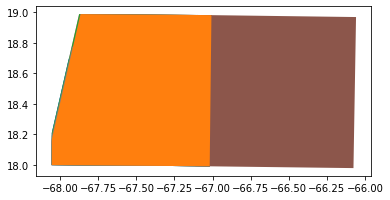

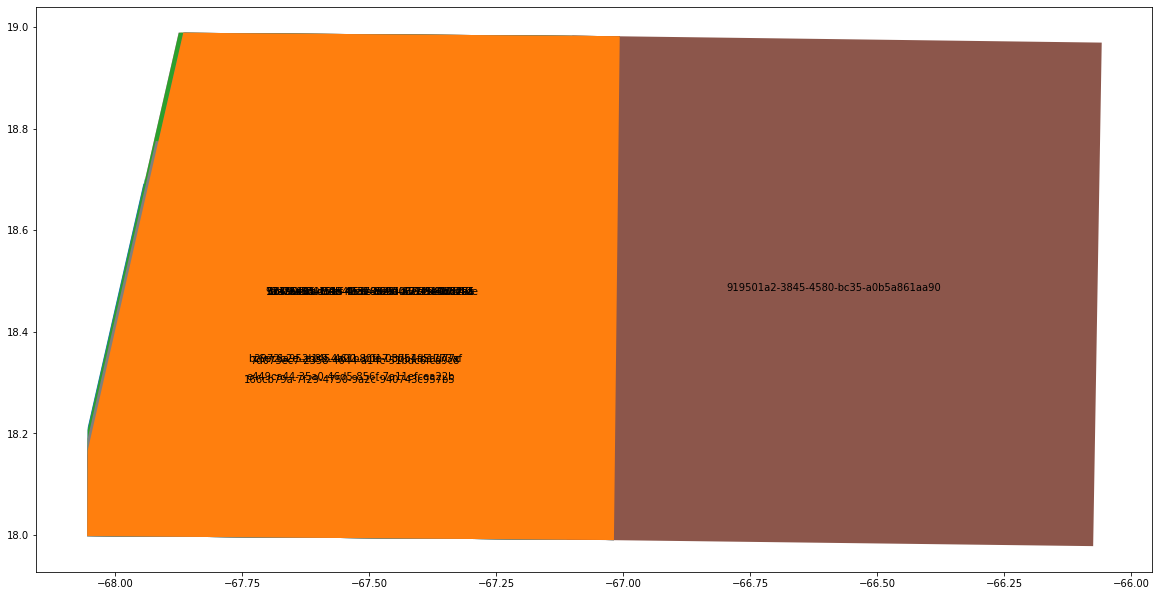

In [141]:
areas = api.to_geodataframe(april_aug2017products)
areas.plot(column='uuid', cmap=None)
ax = areas.plot(column = 'uuid', cmap = None, figsize = (20,20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy = x.geometry.centroid.coords[0], ha = 'center'), axis =1)

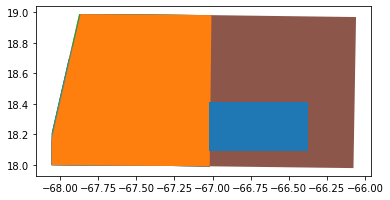

                                                                                  title  \
7d073ec7-2358-4644-a14c-51bdc6fca9c8  S2A_MSIL1C_20170727T150751_N0205_R082_T19QFA_2...   
3d592bdd-bcbf-453b-9e9f-a514b4006f95  S2A_MSIL1C_20170408T150721_N0204_R082_T19QFA_2...   
c24a0e6b-fceb-4e57-80b0-471f5e9bc2ef  S2A_MSIL1C_20170806T150721_N0205_R082_T19QFA_2...   
b2972b2e-2b89-4a00-80fe-0bb51a5dd77c  S2A_MSIL1C_20170528T150751_N0205_R082_T19QFA_2...   
73a86405-1f98-45de-ba9a-627e9827b42e  S2A_MSIL1C_20170717T150721_N0205_R082_T19QFA_2...   
166cb79a-7f29-4750-9a2c-940743c957b5  S2B_MSIL1C_20170722T150749_N0205_R082_T19QFA_2...   
1bf75c83-d515-4fa1-a69d-f37d513d527c  S2A_MSIL1C_20170607T150721_N0205_R082_T19QFA_2...   
9aa2ef3f-062a-41ca-8a2b-06eed44bb4ba  S2A_MSIL1C_20170826T150721_N0205_R082_T19QFA_2...   
573f8a5c-c94e-413f-9547-b1629e072f1d  S2B_MSIL1C_20170712T150719_N0205_R082_T19QFA_2...   
e449ca44-35a0-46d5-856f-7a11efcea22b  S2B_MSIL1C_20170811T150739_N0205_R082_T19QFA_2...   

[12 rows x 34 columns]


In [143]:
gdf = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax, column = 'uuid', cmap = None,)
gdf.plot(ax=ax)
plt.show()
areas_sorted = areas.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
areas_sorted = areas_sorted.head(20)
print(areas_sorted)

In [77]:
api.download('bcd8f556-8a1a-46a5-9462-e6d994b1b764')#july_product*needs to download

Product bcd8f556-8a1a-46a5-9462-e6d994b1b764 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

In [78]:
api.download('16db11f9-964d-4505-9de4-75b37c571a8d')#april product*needs to download

Product 16db11f9-964d-4505-9de4-75b37c571a8d is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

13
